In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import numpy as np

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
snp_info = pd.read_csv('./snp_info.csv')
train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [3]:
snp_info

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [4]:
train.corr()

,father,mother,gender,trait
father,NaN,NaN,NaN,NaN
mother,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN
trait,NaN,NaN,NaN,1.0


In [31]:
check_A = train[train['class'] == "A"]
check_B = train[train['class'] == "B"]
check_C = train[train['class'] == "C"]
check_A

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
15,TRAIN_015,0,0,0,1,A A,G G,A A,G G,A A,...,G G,A A,G G,A G,A G,G A,G G,C C,G G,A
16,TRAIN_016,0,0,0,1,A A,G G,A A,G G,A A,...,G G,A A,G A,G G,A G,G G,G G,C A,G G,A
17,TRAIN_017,0,0,0,1,A G,A G,A A,G G,C A,...,G A,A A,G A,A G,G G,G A,G G,A A,G G,A
18,TRAIN_018,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A A,G G,G G,G G,C A,G G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TRAIN_248,0,0,0,1,A G,G G,A A,G G,A A,...,G G,A A,G G,A G,G G,G G,G G,C A,G A,A
250,TRAIN_250,0,0,0,1,A G,G G,A A,G G,A A,...,G G,A A,G G,A A,G G,G G,G G,A A,G A,A
253,TRAIN_253,0,0,0,1,A A,G G,A A,G G,A A,...,G G,G A,G A,A A,G G,A A,G G,A A,G G,A
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A


In [17]:
check_A['SNP_01'].unique()

array(['A A', 'A G', 'G G'], dtype=object)

In [51]:
check_B['SNP_01'].unique()

array(['G G', 'A G'], dtype=object)

In [52]:
check_C['SNP_01'].unique()

array(['A G', 'G G', 'A A'], dtype=object)

In [18]:
check_A['SNP_02'].unique()

array(['G G', 'A G'], dtype=object)

In [19]:
check_A['SNP_03'].unique()

array(['A A'], dtype=object)

In [20]:
check_A['SNP_04'].unique()

array(['G A', 'G G', 'A A'], dtype=object)

In [21]:
check_A['SNP_06'].unique()

array(['G G', 'A G'], dtype=object)

In [22]:
check_A['SNP_07'].unique()

array(['G G', 'G A'], dtype=object)

In [23]:
check_A['SNP_08'].unique()

array(['A A', 'G A'], dtype=object)

In [24]:
check_A['SNP_09'].unique()

array(['G G', 'G A', 'A A'], dtype=object)

In [25]:
check_A['SNP_10'].unique()

array(['A G', 'G G', 'A A'], dtype=object)

In [26]:
check_A['SNP_11'].unique()

array(['G G', 'A G'], dtype=object)

In [27]:
check_A['SNP_12'].unique()

array(['G G', 'G A', 'A A'], dtype=object)

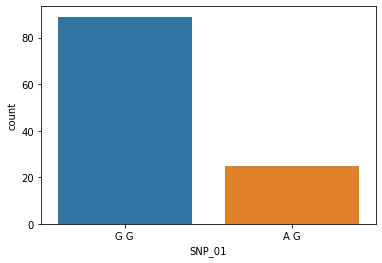

In [48]:
sns.countplot(x = check_B['SNP_01'])
plt.show()

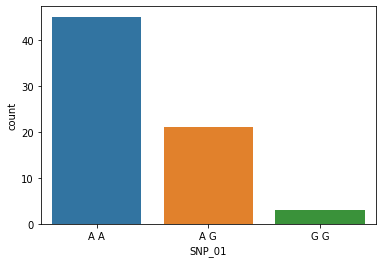

In [53]:
sns.countplot(x = check_A['SNP_01'])
plt.show()

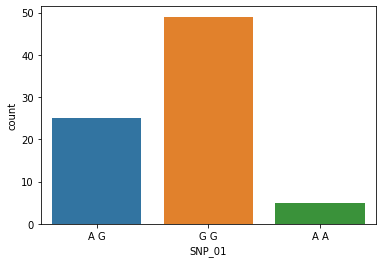

In [54]:
sns.countplot(x = check_C['SNP_01'])
plt.show()

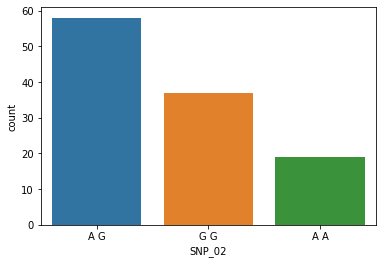

In [47]:
sns.countplot(x = check_B['SNP_02'])
plt.show()

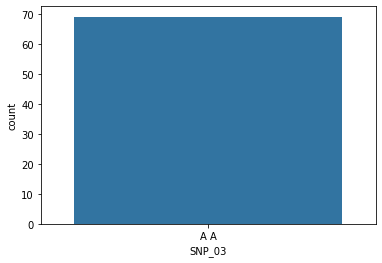

In [49]:
sns.countplot(x = check_A['SNP_03'])
plt.show()

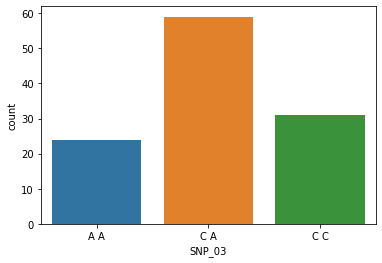

In [46]:
sns.countplot(x = check_B['SNP_03'])
plt.show()

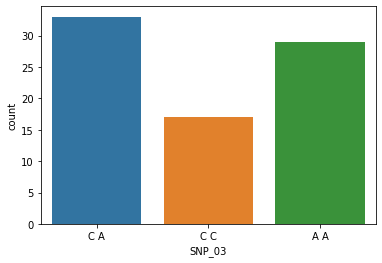

In [50]:
sns.countplot(x = check_C['SNP_03'])
plt.show()

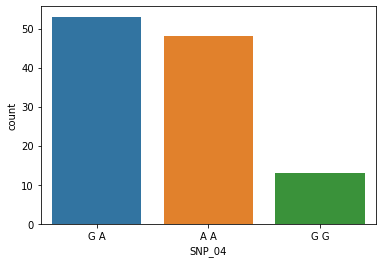

In [45]:
sns.countplot(x = check_B['SNP_04'])
plt.show()

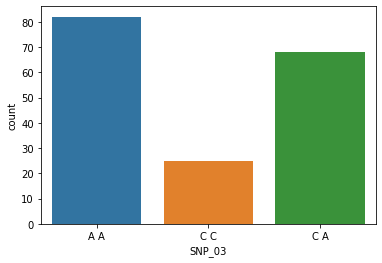

In [62]:
test_A = test['SNP_03']
sns.countplot(x = test_A)
plt.show()

In [59]:
test

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,TEST_170,0,0,0,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,TEST_171,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,TEST_172,0,0,0,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,TEST_173,0,0,0,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A
